<a href="https://colab.research.google.com/github/crislainesc/Aprendizado-de-Maquina-na-Pratica/blob/master/Analisando_Dados_Do_Comercio_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dados do comércio**

*   Data set com dados referentes as exportações, importações e reimportações comércio no período 1 de fevereiro a 12 de agosto de 2020 para analisar os possíveis impactos do COVID-19 .
*   [Effects of COVID-19 on trade: 1 February–12 August 2020 (provisional) ](https://www.stats.govt.nz/assets/Uploads/Effects-of-COVID-19-on-trade/Effects-of-COVID-19-on-trade-1-February-12-August-2020-provisional/Download-data/Effects-of-COVID-19-on-trade-1-February-12-August-2020-provisional.csv)
*   45400 intâncias.

In [11]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


**1. Importando bibliotecas necessárias**

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**2. Carregamento dos dados na memória utilizando a bilioteca Pandas**

In [13]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Semana 1/EFEITOSCOVID-19.csv')

In [14]:
data.head()

,Direction,Year,Date,Weekday,Current_Match,Country,Commodity,Transport_Mode,Measure,Value,Cumulative
0,Exports,2015,31/01/2015,Saturday,1/02/2020,All,All,All,$,257000000,257000000
1,Exports,2015,1/02/2015,Sunday,2/02/2020,All,All,All,$,123000000,380000000
2,Exports,2015,2/02/2015,Monday,3/02/2020,All,All,All,$,176000000,556000000
3,Exports,2015,3/02/2015,Tuesday,4/02/2020,All,All,All,$,115000000,671000000
4,Exports,2015,4/02/2015,Wednesday,5/02/2020,All,All,All,$,74000000,746000000


In [15]:
data.columns

Index(['Direction', 'Year', 'Date', 'Weekday', 'Current_Match', 'Country',
       'Commodity', 'Transport_Mode', 'Measure', 'Value', 'Cumulative'],
      dtype='object')

**3. Limpeza e organização dos dados**

Analisando a leitura dos dados acima podemos perceber que a coluna Weekday (dia da semana) é redundante e irrelevante para a ánalise dos dados, por existir outra coluna com a informação da data. Além disso, as colunas Country, Commodity, Transport_Mode e Measure não são relevantes, para a comparação dos dados que será feita com a relação das direções e dos valores.

Por este motivo tais colunas serão retiradas do dataframe.

In [16]:
data = data.dropna()

In [17]:
data = data.drop(columns=['Weekday'])
data.head()

,Direction,Year,Date,Current_Match,Country,Commodity,Transport_Mode,Measure,Value,Cumulative
0,Exports,2015,31/01/2015,1/02/2020,All,All,All,$,257000000,257000000
1,Exports,2015,1/02/2015,2/02/2020,All,All,All,$,123000000,380000000
2,Exports,2015,2/02/2015,3/02/2020,All,All,All,$,176000000,556000000
3,Exports,2015,3/02/2015,4/02/2020,All,All,All,$,115000000,671000000
4,Exports,2015,4/02/2015,5/02/2020,All,All,All,$,74000000,746000000


Para facilitar a análise de dados os atributos Exports e Imports e Reimports serão trocados por 0, 1 e 2 respectivamente.

In [18]:
data['Direction'] = data['Direction'].replace(['Exports','Imports','Reimports'],[0,1,2])
data.head(45400)

,Direction,Year,Date,Current_Match,Country,Commodity,Transport_Mode,Measure,Value,Cumulative
0,0,2015,31/01/2015,1/02/2020,All,All,All,$,257000000,257000000
1,0,2015,1/02/2015,2/02/2020,All,All,All,$,123000000,380000000
2,0,2015,2/02/2015,3/02/2020,All,All,All,$,176000000,556000000
3,0,2015,3/02/2015,4/02/2020,All,All,All,$,115000000,671000000
4,0,2015,4/02/2015,5/02/2020,All,All,All,$,74000000,746000000
...,...,...,...,...,...,...,...,...,...,...
45395,2,2015,23/02/2015,24/02/2020,All,All,All,$,1000000,17000000
45396,2,2015,24/02/2015,25/02/2020,All,All,All,$,0,18000000
45397,2,2015,25/02/2015,26/02/2020,All,All,All,$,1000000,19000000
45398,2,2015,26/02/2015,27/02/2020,All,All,All,$,1000000,19000000


**4. Análise preliminar dos dados**

**Histograma**

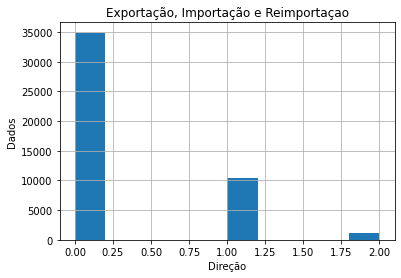

In [19]:
plt.hist(data['Direction'])
plt.xlabel('Direção')
plt.ylabel('Dados')
plt.title('Exportação, Importação e Reimportaçao')
plt.grid(True)
plt.show()

**Contando ocorrências das direções**

In [20]:
print('Exportações:',data[data['Direction'] == 0].shape[0])
print('Importações:',data[data['Direction'] == 1].shape[0])
print('Reimportações:',data[data['Direction'] == 2].shape[0])

Exportações: 34896
Importações: 10476
Reimportações: 1164


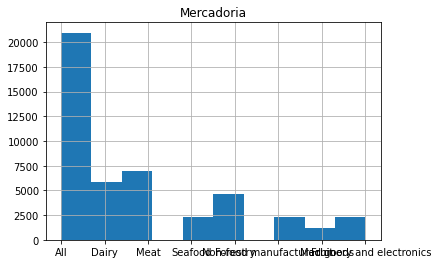

In [21]:
plt.hist(data['Commodity'])
plt.title('Mercadoria')
plt.grid(True)
plt.show()

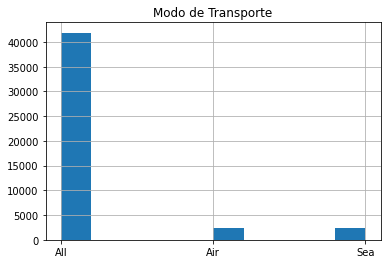

In [22]:
plt.hist(data['Transport_Mode'])
plt.title('Modo de Transporte')
plt.grid(True)
plt.show()

**BoxPlot**

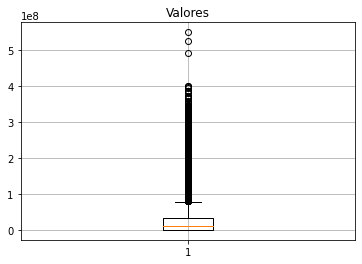

In [23]:
plt.boxplot(data.Value)
plt.title('Valores')
plt.grid()
plt.show()

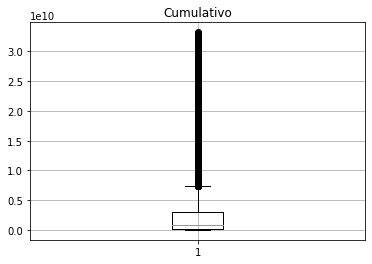

In [24]:
plt.boxplot(data.Cumulative)
plt.title('Cumulativo')
plt.grid()
plt.show()

**Análise comparativa dos valores entre os anos (2015-2020)**

Separando os dados em variáveis.

In [25]:
expor = data[data['Direction']==0].drop(columns=['Direction']).reset_index(drop=True)

In [26]:
impor = data[data['Direction']==1].drop(columns=['Direction']).reset_index(drop=True)

In [27]:
reimpor = data[data['Direction']==2].drop(columns=['Direction']).reset_index(drop=True)

In [28]:
doismildesessete = data[data['Year']==2017].drop(columns=['Year']).reset_index(drop=True)

In [29]:
doismilvinte = data[data['Year']==2020].drop(columns=['Year']).reset_index(drop=True)

In [30]:
sea = data[data['Transport_Mode']=='Sea'].drop(columns=['Transport_Mode']).reset_index(drop=True)

In [31]:
air = data[data['Transport_Mode']=='Air'].drop(columns=['Transport_Mode']).reset_index(drop=True)

In [32]:
reino_unido = data[data['Country']=='United Kingdom'].drop(columns=['Country']).reset_index(drop=True)

In [33]:
japao = data[data['Country']=='Japan'].drop(columns=['Country']).reset_index(drop=True)

In [34]:
eua = data[data['Country']=='United States'].drop(columns=['Country']).reset_index(drop=True)

In [35]:
australia = data[data['Country']=='Australia'].drop(columns=['Country']).reset_index(drop=True)

In [36]:
china = data[data['Country']=='China'].drop(columns=['Country']).reset_index(drop=True)

**Comparação dos dados através dos gráficos.**

Text(0.5, 1.0, 'Valores (2017 e 2020)')

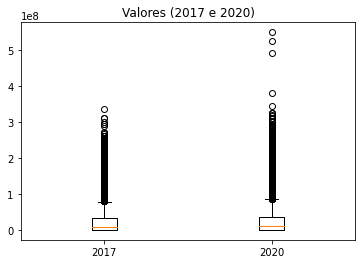

In [37]:
plt.boxplot([doismildesessete.Value, doismilvinte.Value], labels=['2017','2020'])
plt.title('Valores (2017 e 2020)')

Text(0.5, 1.0, 'Meios de Transporte')

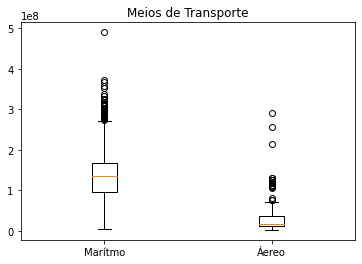

In [38]:
plt.boxplot([sea.Value, air.Value], labels=['Marítmo','Áereo'])
plt.title('Meios de Transporte')

Text(0.5, 1.0, 'Países')

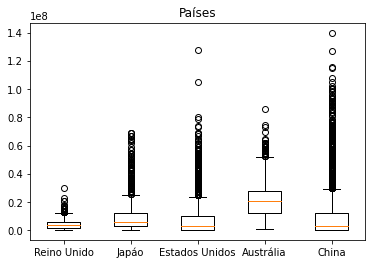

In [39]:
plt.boxplot([reino_unido.Value, japao.Value, eua.Value, australia.Value, china.Value], labels=['Reino Unido','Japáo', 'Estados Unidos', 'Austrália','China'])
plt.title('Países')

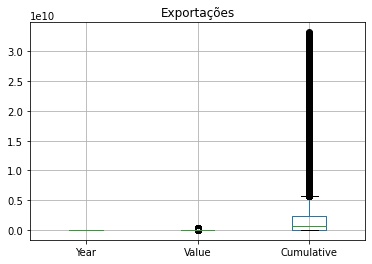

In [40]:
expor.boxplot()
plt.title('Exportações')
plt.show()

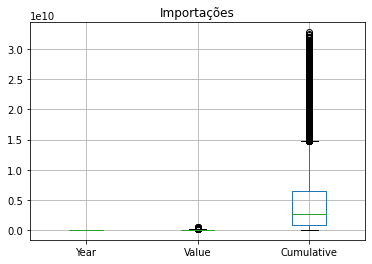

In [41]:
impor.boxplot()
plt.title('Importações')
plt.show()

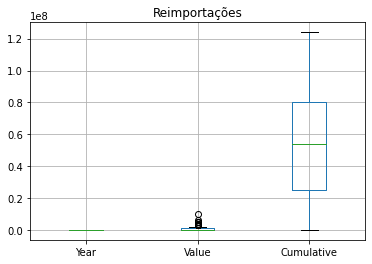

In [42]:
reimpor.boxplot()
plt.title('Reimportações')
plt.show()

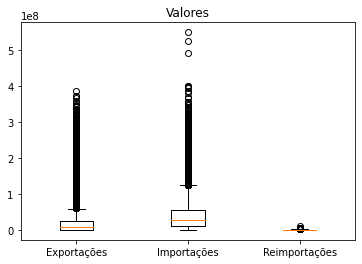

In [43]:
plt.boxplot([expor.Value,impor.Value,reimpor.Value],labels=['Exportações','Importações','Reimportações'])
plt.title('Valores')
plt.show()

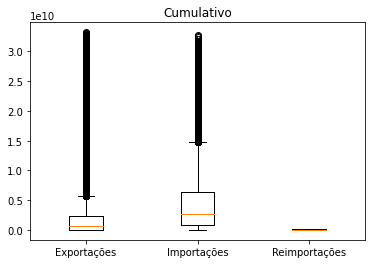

In [44]:
plt.boxplot([expor.Cumulative,impor.Cumulative,reimpor.Cumulative],labels=['Exportações','Importações','Reimportações'])
plt.title('Cumulativo')
plt.show()

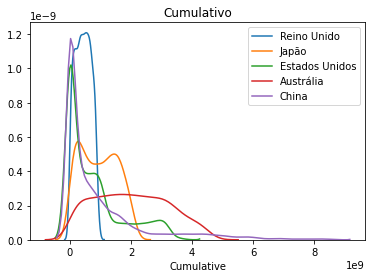

In [45]:
sns.distplot(reino_unido.Cumulative,hist=False,rug=False,label='Reino Unido')
sns.distplot(japao.Cumulative,hist=False,rug=False,label='Japão')
sns.distplot(eua.Cumulative,hist=False,rug=False,label='Estados Unidos')
sns.distplot(australia.Cumulative,hist=False,rug=False,label='Austrália')
sns.distplot(china.Cumulative,hist=False,rug=False,label='China')
plt.title('Cumulativo')
plt.show()

**Análise estátistica dos dados**

Média

In [46]:
print('Exportações')
print('Valores: ', expor.Value.mean())
print('Cumulativo: ', expor.Cumulative.mean())
print('Importações')
print('Valores: ', impor.Value.mean())
print('Cumulativo: ', impor.Cumulative.mean())
print('Reimportações')
print('Valores: ', reimpor.Value.mean())
print('Cumulativo: ', reimpor.Cumulative.mean())

Exportações
Valores:  24243978.736817975
Cumulativo:  2407479712.3452544
Importações
Valores:  56521764.03207331
Cumulativo:  5374413230.24055
Reimportações
Valores:  509450.1718213058
Cumulativo:  53231958.7628866


Desvio Padrão

In [47]:
print('Exportações')
print('Valores: ', expor.Value.std())
print('Cumulativo: ', expor.Cumulative.std())
print('Importações')
print('Valores: ', impor.Value.std())
print('Cumulativo: ', impor.Cumulative.std())
print('Reimportações')
print('Valores: ', reimpor.Value.std())
print('Cumulativo: ', reimpor.Cumulative.std())

Exportações
Valores:  44413241.3450283
Cumulativo:  4838034262.190421
Importações
Valores:  69030111.4040695
Cumulativo:  6522587453.393911
Reimportações
Valores:  787311.2642086025
Cumulativo:  32060741.082730416


Mediana

In [48]:
print('Exportações')
print('Valores: ', expor.Value.median())
print('Cumulativo: ', expor.Cumulative.median())
print('Importações')
print('Valores: ', impor.Value.median())
print('Cumulativo: ', impor.Cumulative.median())
print('Reimportações')
print('Valores: ', reimpor.Value.median())
print('Cumulativo: ', reimpor.Cumulative.median())

Exportações
Valores:  7000000.0
Cumulativo:  661000000.0
Importações
Valores:  28000000.0
Cumulativo:  2702000000.0
Reimportações
Valores:  0.0
Cumulativo:  54000000.0


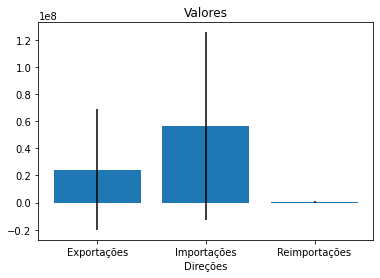

In [49]:
plt.bar(['Exportações','Importações','Reimportações'],[expor.Value.mean(),impor.Value.mean(), reimpor.Value.mean()],yerr=[expor.Value.std(),impor.Value.std(), reimpor.Value.std()])
plt.xlabel('Direções')
plt.title('Valores')
plt.show()

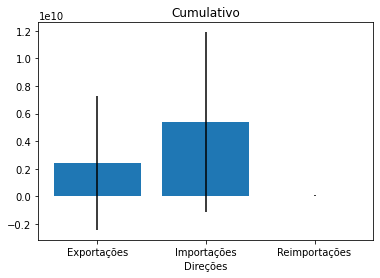

In [50]:
plt.bar(['Exportações','Importações','Reimportações'],[expor.Cumulative.mean(),impor.Cumulative.mean(), reimpor.Cumulative.mean()],yerr=[expor.Cumulative.std(),impor.Cumulative.std(), reimpor.Cumulative.std()])
plt.xlabel('Direções')
plt.title('Cumulativo')
plt.show()

Text(0.5, 1.0, 'China')

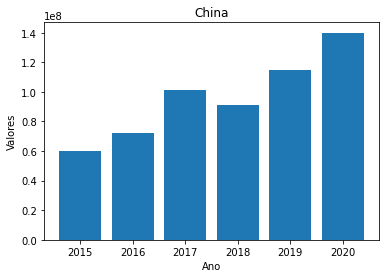

In [69]:
plt.bar(china.Year,china.Value)
plt.ylabel('Valores')
plt.xlabel('Ano')
plt.title('China')

Text(0.5, 1.0, 'Japão')

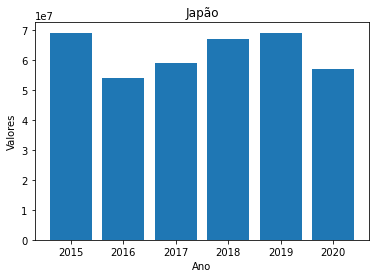

In [70]:
plt.bar(japao.Year,japao.Value)
plt.ylabel('Valores')
plt.xlabel('Ano')
plt.title('Japão')

Comparando os anos de 2019 e 2020, podemos perceber que os países acima sofreram impactos diferentes, a China teve um aumento no valor das exportações, importações e reimportações, diferente do Japão que sofreu um decaída.

**Estudo de correlação entre atributos**

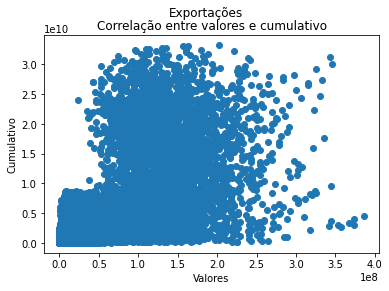

In [53]:
plt.scatter(expor.Value, expor.Cumulative)
plt.xlabel('Valores')
plt.suptitle('Exportações')
plt.ylabel('Cumulativo')
plt.title('Correlação entre valores e cumulativo')
plt.show()

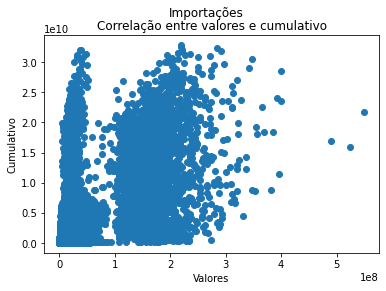

In [54]:
plt.scatter(impor.Value, impor.Cumulative)
plt.xlabel('Valores')
plt.suptitle('Importações')
plt.ylabel('Cumulativo')
plt.title('Correlação entre valores e cumulativo')
plt.show()

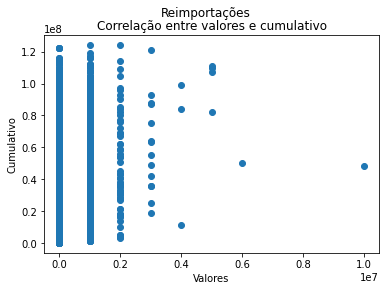

In [55]:
plt.scatter(reimpor.Value, reimpor.Cumulative)
plt.xlabel('Valores')
plt.suptitle('Reimportações')
plt.ylabel('Cumulativo')
plt.title('Correlação entre valores e cumulativo')
plt.show()

In [56]:
corr = data.corr()
corr

,Direction,Year,Value,Cumulative
Direction,1.000000,0.000236,0.161824,0.142535
Year,0.000236,1.000000,0.041330,0.039677
Value,0.161824,0.041330,1.000000,0.703101
Cumulative,0.142535,0.039677,0.703101,1.000000


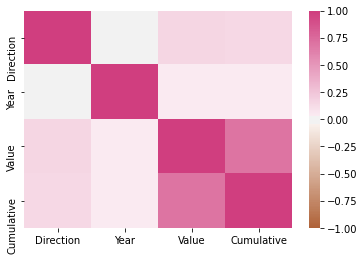

In [57]:
sns.heatmap(corr, vmin = -1, vmax = 1, center = 0, cmap = sns.diverging_palette(30, 350 ,n=900))

A análise preliminar dos dados mostram que os atributos não possuem correlação entre si.

**5. Re-escala dos dados**

In [58]:
data.head()

,Direction,Year,Date,Current_Match,Country,Commodity,Transport_Mode,Measure,Value,Cumulative
0,0,2015,31/01/2015,1/02/2020,All,All,All,$,257000000,257000000
1,0,2015,1/02/2015,2/02/2020,All,All,All,$,123000000,380000000
2,0,2015,2/02/2015,3/02/2020,All,All,All,$,176000000,556000000
3,0,2015,3/02/2015,4/02/2020,All,All,All,$,115000000,671000000
4,0,2015,4/02/2015,5/02/2020,All,All,All,$,74000000,746000000


In [59]:
valores = data.Value
valores

0        257000000
1        123000000
2        176000000
3        115000000
4         74000000
           ...    
46531            0
46532            0
46533      5000000
46534      1000000
46535      1000000
Name: Value, Length: 46536, dtype: int64

In [60]:
cumulativo = data.Cumulative
cumulativo

0        257000000
1        380000000
2        556000000
3        671000000
4        746000000
           ...    
46531    105000000
46532    105000000
46533    110000000
46534    110000000
46535    111000000
Name: Cumulative, Length: 46536, dtype: int64

In [61]:
anos = data.Year
anos

0        2015
1        2015
2        2015
3        2015
4        2015
         ... 
46531    2020
46532    2020
46533    2020
46534    2020
46535    2020
Name: Year, Length: 46536, dtype: int64

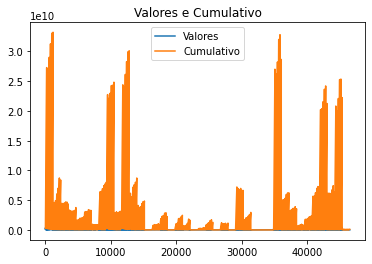

In [62]:
plt.plot(valores, label='Valores')
plt.plot(cumulativo, label='Cumulativo')
plt.title('Valores e Cumulativo')
plt.legend()
plt.show()

In [63]:
valores = (valores-valores.mean())/valores.std()

In [64]:
cumulativo = (cumulativo-cumulativo.mean())/cumulativo.std()

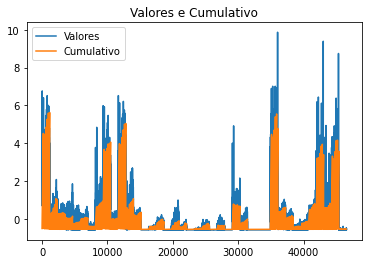

In [65]:
plt.plot(valores, label='Valores')
plt.plot(cumulativo, label='Cumulativo')
plt.title('Valores e Cumulativo')
plt.legend()
plt.show()

**Conclusões**

Com a adoção de uma política de combate a pandemia adequeda há uma boa probabilidade de que o país não sofra impactos severos em sua economia.